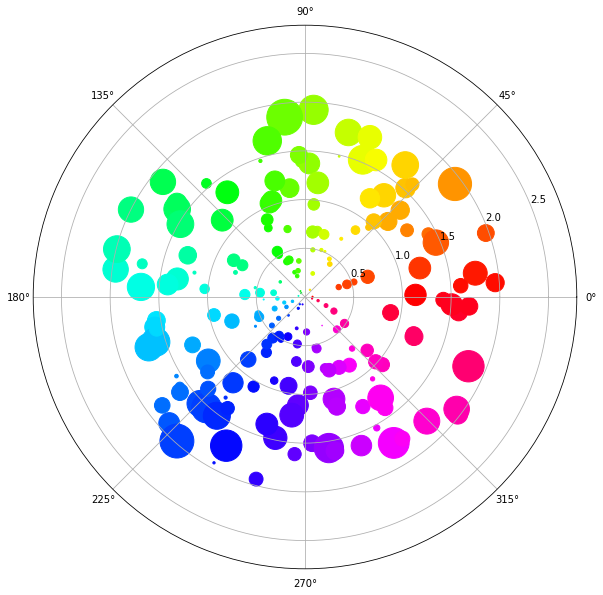

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n_points = 200

radius   = 2 * np.random.rand(n_points)
angles   = 2 * (np.pi) * np.random.rand(n_points)
area     = 400 * (radius**2) * np.random.rand(n_points)

colors = angles

fig = plt.figure(figsize=(20,10))
ax  = plt.subplot(111, polar=True)

c = plt.scatter(angles, radius, c=colors, s=area, cmap=plt.cm.hsv)
c.set_alpha(1.95)

plt.show()
#fig.savefig("vis_bubbleplot.png")

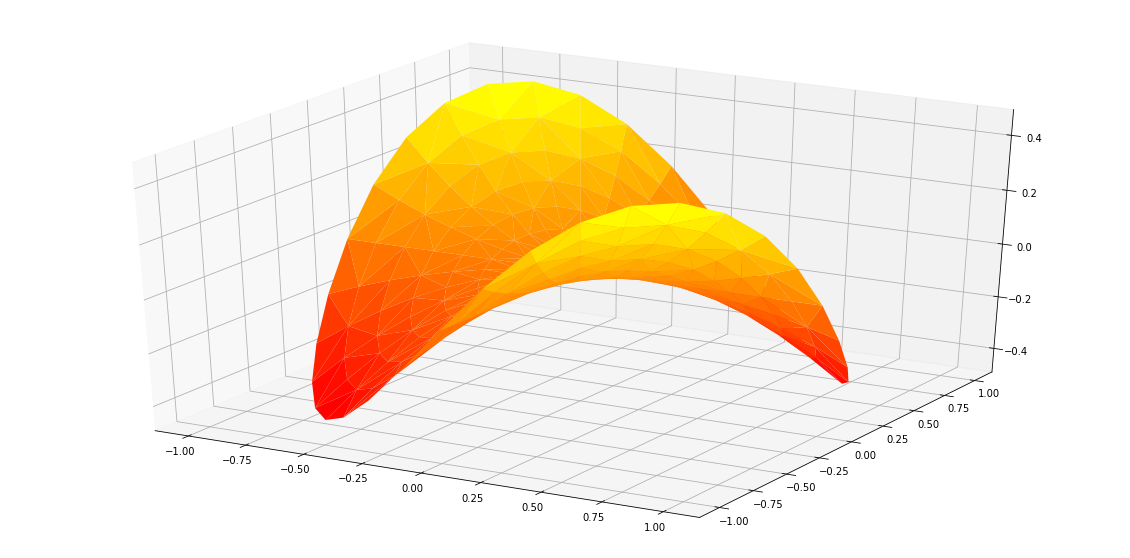

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

countof_angles = 36
countof_radii  = 8

# array - radii
array_rad = np.linspace(0.125, 1.0, countof_radii)

# array - angles
array_ang = np.linspace(0, 2*np.pi, countof_angles, endpoint=False)

# repeat all angles per radius
array_ang = np.repeat(array_ang[...,np.newaxis], countof_radii, axis=1)

# from polar (radii, angles) coords to cartesian (x, y) coords
x = np.append(0, (array_rad*np.cos(array_ang)).flatten())
y = np.append(0, (array_rad*np.sin(array_ang)).flatten())

# saddle shaped surface
z = np.sin(-x*y)

fig = plt.figure(figsize=(20,10))
ax  = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.autumn, linewidth=0.2)

plt.show()
#fig.savefig("vis_3d.png")

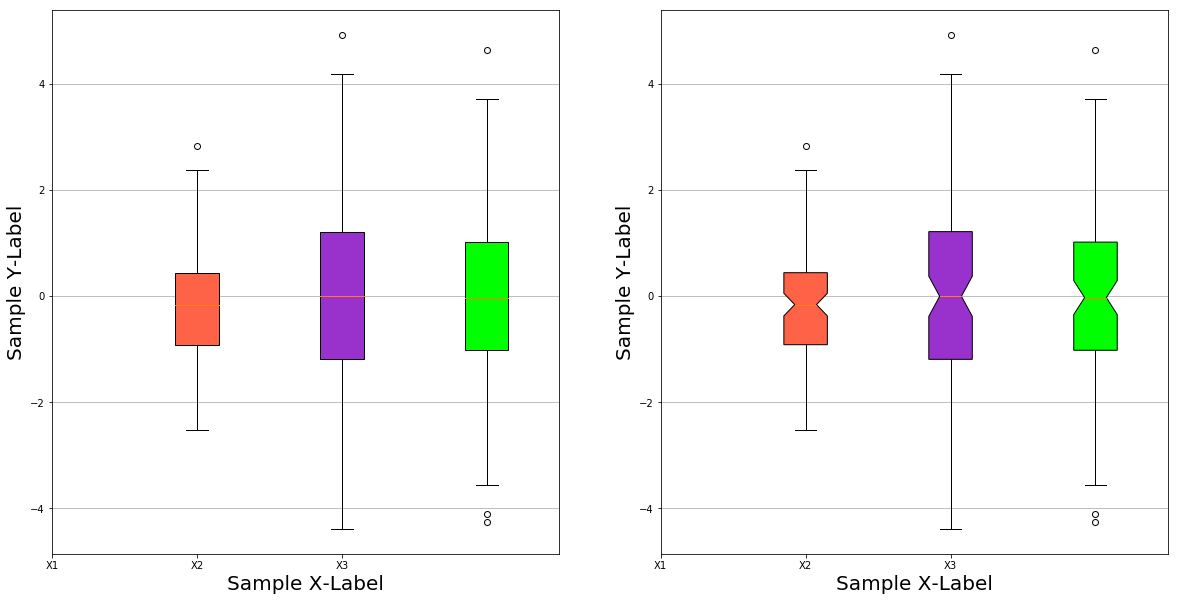

In [3]:
np.random.seed(452)

# Three ararys of 100 points each
A1 = np.random.normal(0, 1, 100)
A2 = np.random.normal(0, 2, 100)
A3 = np.random.normal(0, 1.5, 100)

# Concatenate the three arrays
data = [ A1, A2, A3 ]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))


# Box plot: Notch Shape
bplot1 = axes[1].boxplot(data,
                         notch=True,  
                         vert=True,           # vertical aligmnent
                         patch_artist=True)   # color

# Box plot: Rectangular 
bplot2 = axes[0].boxplot(data,
                         vert=True,           # vertical aligmnent
                         patch_artist=True)   # color




colors = ['tomato', 'darkorchid', 'lime']
# more colors here: http://matplotlib.org/examples/color/named_colors.html

for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Grid lines, Xticks, Xlabel, Ylabel
for axis in axes:
    axis.yaxis.grid(True)
    axis.set_xticks([y for y in range(len(data))], )
    axis.set_xlabel('Sample X-Label',fontsize=20)
    axis.set_ylabel('Sample Y-Label',fontsize=20)

    
# Xtick labels
plt.setp(axes, xticks=[y for y in range(len(data))],
         xticklabels=['X1', 'X2', 'X3'])

plt.show()
#fig.savefig("vis_boxplot.png")

In [4]:
import folium
import pandas as pd

In [17]:
country_geo = 'world-countries.json'

In [7]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [8]:
data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


In [9]:
indName = 'CO2 emissions \(metric'
year = 2011

mask1 = data['IndicatorName'].str.contains(indName)
mask2 = data['Year'].isin([year])

data_co2 = data[mask1 & mask2]
data_co2.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [10]:
plot_data = data_co2[['CountryCode', 'Value']]
plot_data.head(2)

,CountryCode,Value
5026275,ARB,4.72450
5026788,CSS,9.69296


In [11]:
map = folium.Map(location=[100,0], zoom_start=1.5)

map.choropleth(geo_data = country_geo, data = plot_data,
                  columns = ['CountryCode', 'Value'],
                  key_on = 'feature.id',
                  fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
                  legend_name = indName)

map.save('plot_data.html')


/home/supriya/anaconda3/lib/python3.7/site-packages/folium/folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [14]:
from IPython.display import HTML
HTML('<iframe src = plot_data.html width = 700 height = 450></iframe>')

/home/supriya/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
